In [1]:
"""Show video with trajectories computed for different track lengths"""

'Show video with trajectories computed for different track lengths'

In [1]:
%matplotlib inline
import os
import sys
sys.path.append("/home/mam588/updated_cilia")
sys.path.append("/home/mam588/dense_trajectory_release_v1.2")

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from tqdm import tnrange, tqdm_notebook

import cilia.utils.video as video_utils
from cilia.tree import _is_track_active
import densetrack

In [2]:
# configuration options for matplotlib
mpl.rcParams['axes.titlesize'] = 'x-small'
mpl.rcParams['axes.grid'] = False

In [3]:
# load video
video = video_utils.read(os.path.realpath("videos/7417-11.avi"))
# show first frame
# plt.figure()
# plt.imshow(video[0], cmap='gray', vmin=0, vmax=255, interpolation='none', aspect='equal')

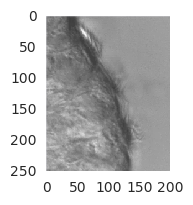

In [4]:
# select ROI from video and show first frame
roi = video[:100, 150:400, 300:500]
plt.figure(figsize=(3, 2))
plt.imshow(roi[0], cmap='gray', vmin=0, vmax=255, interpolation='none', aspect='equal')
plt.grid(False)

In [10]:
# compute dense trajectories
tracks = densetrack.densetrack(roi)
scales_uniq = np.unique(tracks['scale'])
print('# unique scales: {}'.format(len(scales_uniq)))

# unique scales: 6


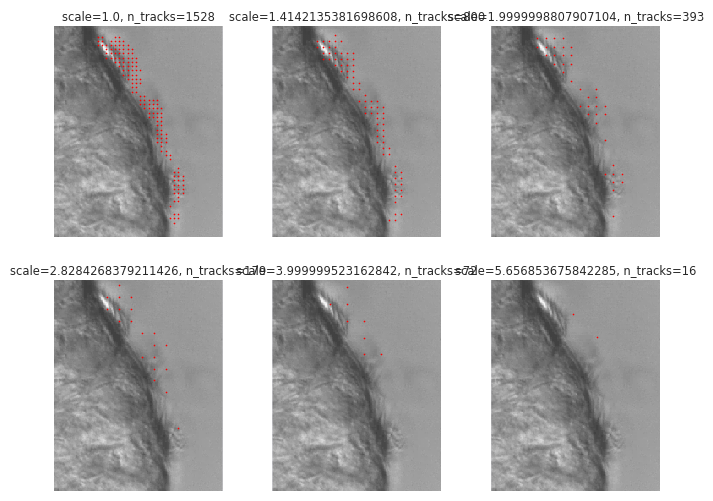

In [12]:
# set up figure and axes
fig, axes = plt.subplots(2, 3, figsize=(8, 6))

def animate(frame_idx):
    for ax, scale in zip(axes.flat, scales_uniq):
        trs = tracks[tracks['scale'] == scale]
        ax.clear()
        ax.grid(False)
        ax.set_title('scale={}, n_tracks={}'.format(scale, len(trs)))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        # show frame
        im = ax.imshow(roi[frame_idx], cmap='gray', vmin=0, vmax=255, 
                       interpolation='none', aspect='equal', animated=True)
        ax.autoscale(False)
        
        for tr, end in zip(trs['coords'], trs['frame_num']):
            if _is_track_active(tr, end, frame_idx):
                start_frame = end - len(tr) + 1
                tr = tr[:frame_idx-start_frame+1]
                # head of trajectory
                head, = ax.plot(tr[-1, 0], tr[-1, 1], 'o', ms=1.2, c='r')
                # body of trajectory
                if tr.shape[0] > 1:
                    body, = ax.plot(*tr.T, '-', lw=0.6, c='g')

anim = animation.FuncAnimation(fig, animate, frames=len(roi), interval=100, blit=False)
HTML(anim.to_html5_video())